# Homework 4: Classification I



## Loading the Data:

In [1]:
import pandas as pd
from sklearn import preprocessing as pp
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split   
bank_data=pd.read_csv("bank-additional-full.csv",sep=";")
bank_data_cast=bank_data.copy()
#changing datatype from 'object' to 'category' to label the categorical data
for i in bank_data_cast.select_dtypes(include=['object']).columns:
    bank_data_cast[i]=bank_data_cast[i].astype('category')
bank_data_cast

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Assigning labels to the categorical data

In [2]:
bank_data_labeled=bank_data_cast.copy()
bank_data_labeled=pd.get_dummies(bank_data_labeled)
# for i in bank_data_cast.select_dtypes(include=['category']).columns:
#     bank_data_labeled[i]=bank_data_labeled[i].cat.codes
bank_data_labeled=bank_data_labeled.drop(['y_no'],axis=1)
bank_data_labeled.iloc[:,-1]=bank_data_cast.iloc[:,-1]
bank_data_labeled.iloc[:,-1]=bank_data_labeled.iloc[:,-1].cat.codes
bank_data_labeled

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,1,0,0,0,0,1,0,0


## Normalizing the data using StandardScaler

Since the features are on different scales

In [3]:
#Input features
input_vars=bank_data_labeled.iloc[:,0:20]
#Target/Output
target_var=bank_data_labeled['y_yes']
input_var1=pp.StandardScaler().fit(input_vars[input_vars.columns])
input_var_std=input_var1.transform(input_vars)
input_var_std=pd.DataFrame(input_var_std,columns=input_vars.columns)
input_var_std

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.191430,6.152772,-0.276435,-0.208757,-0.189032,-0.326556,-0.147327,-0.442449
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.191430,-0.162528,-0.276435,-0.208757,-0.189032,3.062258,-0.147327,-0.442449
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.191430,-0.162528,-0.276435,-0.208757,-0.189032,3.062258,-0.147327,-0.442449
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,1.718146,-0.538317,-0.191430,-0.162528,-0.276435,-0.208757,-0.189032,-0.326556,-0.147327,-0.442449
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.191430,-0.162528,-0.276435,-0.208757,-0.189032,3.062258,-0.147327,-0.442449
5,0.477486,-0.232513,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.191430,-0.162528,-0.276435,-0.208757,-0.189032,3.062258,-0.147327,-0.442449
6,1.820911,-0.460069,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,1.718146,-0.538317,-0.191430,-0.162528,-0.276435,-0.208757,-0.189032,-0.326556,-0.147327,-0.442449
7,0.093650,-0.159232,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,1.857642,-0.191430,-0.162528,-0.276435,-0.208757,-0.189032,-0.326556,-0.147327,-0.442449
8,-1.537652,0.469442,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.191430,-0.162528,-0.276435,-0.208757,-0.189032,-0.326556,-0.147327,2.260146
9,-1.441693,-0.803333,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,-0.582023,-0.538317,-0.191430,-0.162528,-0.276435,-0.208757,-0.189032,3.062258,-0.147327,-0.442449


## Splitting the data into 'train' and 'test'

<p style="font-size:16px"> As suggested in [1] I have split the data in an 80:20 ratio, i.e training data is 80% and test data is 20% of the original data as there is a large amount of data(~41k samples) </p>

In [4]:
X_train, X_test, y_train, y_test = train_test_split(input_var_std, target_var, test_size=0.20)

## Running the KNN Classifier
<p style="font-size:16px"> The 'K' value selected here is 13 after running the classifier for multiple iterations.<br> A confusion matrix has been shown, and also a classification report has been plotted which shows the precision, recall and f1-score for the individual labels('0=No','1=Yes') </p>

In [10]:
knn = KNeighborsClassifier(n_neighbors=13)  
knn.fit(X_train, y_train) 
knn_pred = knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix  , accuracy_score
print(confusion_matrix(y_test, knn_pred,labels=[0,1]))  
print(classification_report(y_test, knn_pred)) 

[[7114  234]
 [ 522  368]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7348
           1       0.61      0.41      0.49       890

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.77      0.69      0.72      8238
weighted avg       0.90      0.91      0.90      8238



In [11]:
print("Accuracy of KNN Classifier: "+str(round(accuracy_score(y_test,knn_pred)*100,2))+"%")

Accuracy of KNN Classifier: 90.82%


## Visualizing Data

In [7]:
#Using seaborn to visualize the data after classification
Xcap=X_test.reset_index(drop=True)
output=pd.DataFrame(knn_pred,columns=['y'])
bank=Xcap.join(pd.DataFrame(output))
bank=bank.replace(0,"No")
bank=bank.replace(1,"Yes")
import seaborn as sns
#The below code plots every possible pair of features, i.e 400 plots
#These plots have only been used to identify the correct features
#This will take a longer time to run
#sns.pairplot(bank,hue="y")

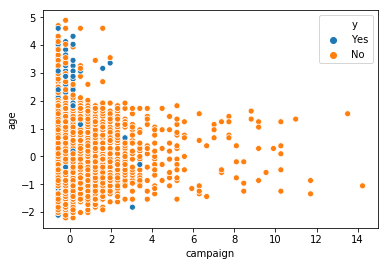

In [8]:
ax = sns.scatterplot(x="campaign", y="age", hue="y",data=bank)

In [9]:
ax = sns.scatterplot(x="poutcome", y="loan", hue="y",data=bank)
plt.legend(loc='upper left')

ValueError: Could not interpret input 'poutcome'

# Running the SVM(linear) classifier
<p style="font-size:16px">  The SVM classifier is run here. The kernel function being used is a linear function. The RBF kernel is shown later. A confusion matrix and classification report is presented here as before for both the kernel types.</p>

In [13]:
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear')  
svclassifier.fit(X_train, y_train) 
svm_pred = svclassifier.predict(X_test) 
print(confusion_matrix(y_test,svm_pred))  
print(classification_report(y_test,svm_pred))

[[7209  139]
 [ 642  248]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7348
           1       0.64      0.28      0.39       890

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.78      0.63      0.67      8238
weighted avg       0.89      0.91      0.89      8238



In [14]:
print("Accuracy of SVM(Linear) Classifier: "+str(round(accuracy_score(y_test,svm_pred)*100,2))+"%")

Accuracy of SVM(Linear) Classifier: 90.52%


## Visualizing Data

In [15]:
#SVM-Linear
Xcap=X_test.reset_index(drop=True)
output=pd.DataFrame(svm_pred,columns=['y'])
bank_svm=Xcap.join(pd.DataFrame(output))
bank_svm=bank_svm.replace(0,"No")
bank_svm=bank_svm.replace(1,"Yes")

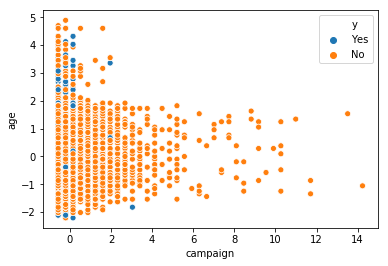

In [16]:
ax = sns.scatterplot(x="campaign", y="age", hue="y",data=bank_svm)

In [17]:
# ax = sns.scatterplot(x="poutcome", y="loan", hue="y",data=bank_svm)
# plt.legend(loc='upper left')

# Running the SVM(RBF) classifier

In [18]:
svclassifier_rbf = SVC(kernel='rbf')  
svclassifier_rbf.fit(X_train, y_train) 
svm_rbf_pred = svclassifier_rbf.predict(X_test) 
print(confusion_matrix(y_test,svm_rbf_pred))  
print(classification_report(y_test,svm_rbf_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[7197  151]
 [ 554  336]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7348
           1       0.69      0.38      0.49       890

   micro avg       0.91      0.91      0.91      8238
   macro avg       0.81      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



In [19]:
print("Accuracy of SVM(RBF) Classifier: "+str(round(accuracy_score(y_test,svm_rbf_pred)*100,2))+"%")

Accuracy of SVM(RBF) Classifier: 91.44%


## Visualizing Data

In [ ]:
#SVM-RBF
Xcap=X_test.reset_index(drop=True)
output=pd.DataFrame(svm_rbf_pred,columns=['y'])
bank_svm_rbf=Xcap.join(pd.DataFrame(output))
bank_svm_rbf=bank_svm_rbf.replace(0,"No")
bank_svm_rbf=bank_svm_rbf.replace(1,"Yes")

In [ ]:
ax = sns.scatterplot(x="campaign", y="age", hue="y",data=bank_svm_rbf)

In [ ]:
ax = sns.scatterplot(x="poutcome", y="loan", hue="y",data=bank_svm_rbf)
plt.legend(loc='upper left')

## Observations

<p style="font-size:16px"> The classifiers have predicted the appropriate classes, and one color represents a 'No' and the other color represents a 'Yes' <br> The following points have been observed from the plots:(The plots can be observed more clearly by uncommenting the line "#sns.pairplot(bank,hue="y")" </p>

<ol style="font-size:16px">
    <li>When 'campaign'-feature number 12, is plotted against any of the other features, it has been observed that irrespective of the other feature, as the campaign increases, i.e as the number of contacts to the clients performed during the campaign increases, there is lesser chance for the client to opt for the bank term deposit </li>
    <li>Another interesting pattern to observe is that, if the client has or does not have a personal or housing loan, but the outcome of the previous campaign was a success, then he/she is likely to subscribe for the product</li>
    <li>But even if he/she does have a loan, and if they are contacted more number of times during campaign, there is a lower chance for subscription of the product</li>
</ol>

# References

[1] Kevin P. Murphy, Machine Learning A Probabilistic Perspective<br>
[2] https://scikit-learn.org/stable/
